# Charlotte-Esi Abraham-Super-Store-Data-Analysis


### Problem Statement

A multinational retail company decides to embark on a campaign called **'Operation  Increase Sales and Profit' (OISP)** which 

focuses on increasing the sales of the company and maximising profit. Before the management team of the company can take 

any actionable decision with regards to the campaign,they want to draw the necessary insight from their 'sitting data'.


### Goals

At the end of this analysis:
 1. We should be able to identify factors that affect sales of a product
 2. Which products should the company invest more in to maximize profit
 
 **Super_Store Variables**
 
1.  row_id  -    unique identity given to a row        
2.  order_id  -  unique identity for an order
3.  order_date - date a product was ordered    
4.  ship_date  - data a product was shipped    
5.  ship_mode  - mode determines days for shipping  
6.  customer_id - unique identity of a customer  
7.  customer_name - name of customer  
8.  city        -   city  product was ordered
9.  state       - state  product was ordered    
10. country     -  country product was ordered  
11. postal_code  - postal_code of city product was ordered          
12. market       -  market a product is purchased    
13. region        - region a product is purchased      
14. product_id -   unique identity given to a product          
15. category -      main categories products are grouped into             
16. sub-category -  categories under the main categoroes of products   
17. product_name -  name of product ordered   
18. sales      -    amount made from a transaction        
19. quantity  -     number of products ordered            
20. discount    -   percentage discount of a product          
21. shipping_cost  - cost of shipping       
22. order_priority -priority given to an order  
23. unit_price - cost per price
24. discounted amount - discount applied to a transaction
25. month -month product was ordered
26. year -year product was ordered
27. interval_days - interval between 
 

# Contents

 [Back to Outline](#Contents)

1. [Loading Data](#Loading-data)
2. [Assessing Data](#Assessing-data)
3. [Data Cleaning](#Data-Cleaning)
4. [Feature Engineering](#Feature-Engineering)
5. [Further Analysis](#Further-Analysis)
6. [Insights](#Insights)
5. [Recommendation](#Recommendation)

# Importing libraries

In [59]:
##Importing the necessary packages and libraries
!pip install missingno 
import missingno as msno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

# Loading-data

In [60]:
# reading the csv_file and 
data = pd.read_csv('super_store.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


# Assessing-data

In [61]:
#dimension of dataset
data.shape

(51290, 24)

The superstoredata set has 24 columns and 51290 rows. This information will be using when determing columns that have missing values.

In [62]:
# metadata of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

From the table above, **Postal Code records** a non-null of 9994 which is less than the total rows number. This means **Postal code** has missing values.

# Data-Cleaning

In [63]:
#changing the columns to lower case
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ", "_")

<AxesSubplot:>

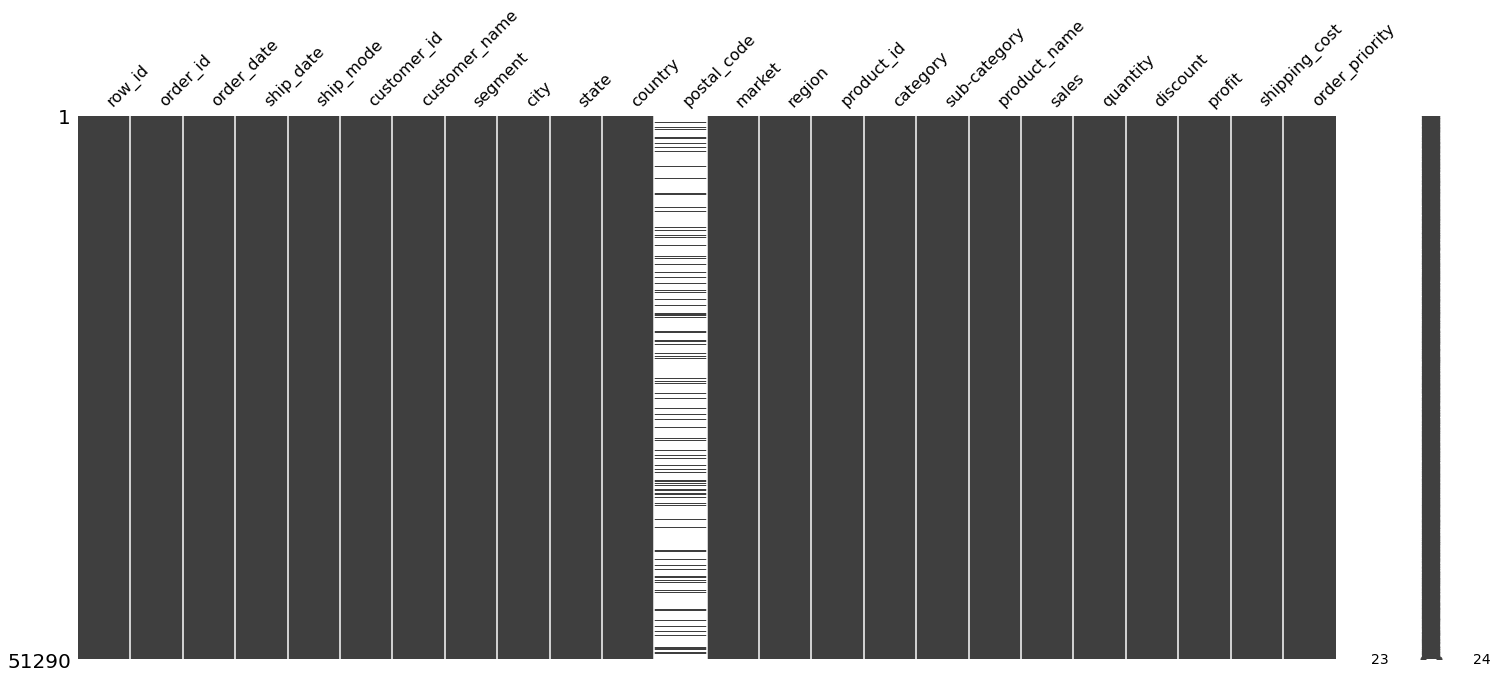

In [64]:
#using missingno to visualise the missing values in the dataset
msno.matrix(data)

From the diagram above, more than **50%** of the data in the **Postal code** is **missing**. Hence we will have to drop the column when cleaning the data we can use other columns like state, city and region to track the location of the customer.

In [65]:
# dropping the postal_code column
data.drop("postal_code", axis=1, inplace=True)
data.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium


# Exploratory Data Analysis

In [66]:
# statistical summary of numerical columns
data.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000


 From the table above, we can conclude the minimum sales was 0.4440  whiles the maximum sales for a transaction sales was 22638.40. The maxiumum quantity ordered for a specific  product was 14 and minimum quantity was 1.The maximum profit was 51290 and the minimum was loss of  -65599.97
From this table, it will be interesting to find out :

- Which transaction had  highest and lowest sales
- Which transaction had the highest order quantity 
- Which transaction made the most and least profit

In [222]:
data.describe(include = "O")

,order_id,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,order_priority,month
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4,12
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium,Nov
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433,5660


In [67]:
#finding order that made least sales
data[data['sales']==data['sales'].min()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
32580,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,0.444,1,0.8,-1.11,0.01,Medium


The transaction which had the lowest sales was Roover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum (quantity 1) made a sales of 0.444 dollars and a lost of -1.11. 

In [68]:
##finding order that made maximum sales
data[data['sales']==data['sales'].max()]


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
28612,33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,United States,US,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.48,6,0.5,-1811.0784,24.29,Medium


The transaction which had the highest sales was Cisco TelePresence System EX90 Videoconferencing Unit (quantity 6) made a sales of 22638.48 dollars and interesting made a loss of -811.0784

In [69]:
# finding order which highest quantity
data[data['quantity']==data['quantity'].max()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
106,16113,ES-2011-5940123,2011-01-06,2011-04-06,Second Class,MC-18130,Mike Caudle,Corporate,Warrington,England,United Kingdom,EU,North,TEC-AC-10000140,Technology,Accessories,"Enermax Numeric Keypad, Bluetooth",805.5600,14,0.00,185.2200,80.12,Medium
640,14266,ES-2011-3341008,2011-02-12,2011-03-12,First Class,AH-10210,Alan Hwang,Consumer,Paris,Ile-de-France,France,EU,Central,OFF-BI-10003616,Office Supplies,Binders,"Avery Binding Machine, Clear",676.2000,14,0.00,81.0600,79.41,Medium
1126,50732,SA-2011-1570,2011-04-08,2011-09-08,Standard Class,RH-9555,Ritsa Hightower,Consumer,Riyadh,Ar Riyad,Saudi Arabia,EMEA,EMEA,FUR-IKE-10004853,Furniture,Bookcases,"Ikea Corner Shelving, Mobile",1758.1200,14,0.00,228.4800,91.73,Medium
1648,48389,UP-2011-680,2011-06-09,2011-08-09,Second Class,SF-10065,Sandra Flanagan,Consumer,Donets'k,Donetsk,Ukraine,EMEA,EMEA,OFF-ROG-10002818,Office Supplies,Storage,"Rogers Trays, Industrial",870.2400,14,0.00,347.7600,160.27,High
1938,50745,KE-2011-8720,2011-07-09,2011-12-09,Standard Class,RB-9465,Rick Bensley,Home Office,Mombasa,Coast,Kenya,Africa,Africa,OFF-IBI-10000951,Office Supplies,Binders,"Ibico Binder Covers, Economy",191.1000,14,0.00,26.4600,15.20,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49711,3654,US-2012-151330,2012-09-30,2012-04-10,Standard Class,JB-16000,Joy Bell-,Consumer,Salvador,Bahia,Brazil,LATAM,South,TEC-MA-10003990,Technology,Machines,"Panasonic Card Printer, White",642.9920,14,0.60,-932.5680,39.58,Medium
50240,29771,ID-2014-52902,2014-12-30,2015-01-01,First Class,JW-16075,Julia West,Consumer,Ho Chi Minh City,Ho Chí Minh City,Vietnam,APAC,Southeast Asia,TEC-AC-10001312,Technology,Accessories,"Logitech Numeric Keypad, Erganomic",327.4446,14,0.47,-92.9754,44.80,High
50825,19869,ES-2012-4400520,2012-08-31,2012-05-09,Standard Class,JK-15205,Jamie Kunitz,Consumer,Mulhouse,Alsace,France,EU,Central,OFF-ST-10002800,Office Supplies,Storage,"Tenex Folders, Industrial",298.6200,14,0.10,-33.1800,10.54,Medium
50934,32726,US-2012-164448,2012-10-31,2012-04-11,Second Class,DK-12835,Damala Kotsonis,Corporate,Salinas,California,United States,US,West,OFF-LA-10003510,Office Supplies,Labels,"Avery 4027 File Folder Labels for Dot Matrix Printers, 5000 Labels per Box, White",427.4200,14,0.00,196.6132,42.26,High


186 transactions ordered 14 products per transaction.

In [70]:
##finding order that made least profit
data[data['profit']==data['profit'].max()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
8898,38123,CA-2013-118689,2013-03-10,2013-10-10,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,United States,US,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976,349.07,Medium


Canon imageCLASS 2200 Advanced Copier made the highest profit of  8399.976 dollars.

In [71]:
## order that made least sales
data[data['profit']==data['profit'].min()]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
43453,39069,CA-2013-108196,2013-11-26,2013-03-12,Standard Class,CS-12505,Cindy Stewart,Consumer,Lancaster,Ohio,United States,US,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,451.63,Low


**Cubify CubeX 3D Printer Double Head Print** made a loss of -6599.978 dollars.

In [72]:
#Finding the unique value count of the unique values of a column
columns=["ship_mode","segment","market","city","region","category","sub-category","order_priority"]
for col in columns:
    print(col)
    print(data[col].value_counts())
    print("\n")

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64


segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64


market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: market, dtype: int64


city
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Melitopol'         1
Terneuzen          1
Athis-Mons         1
Yuyao              1
Deer Park          1
Name: city, Length: 3636, dtype: int64


region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: region, dty

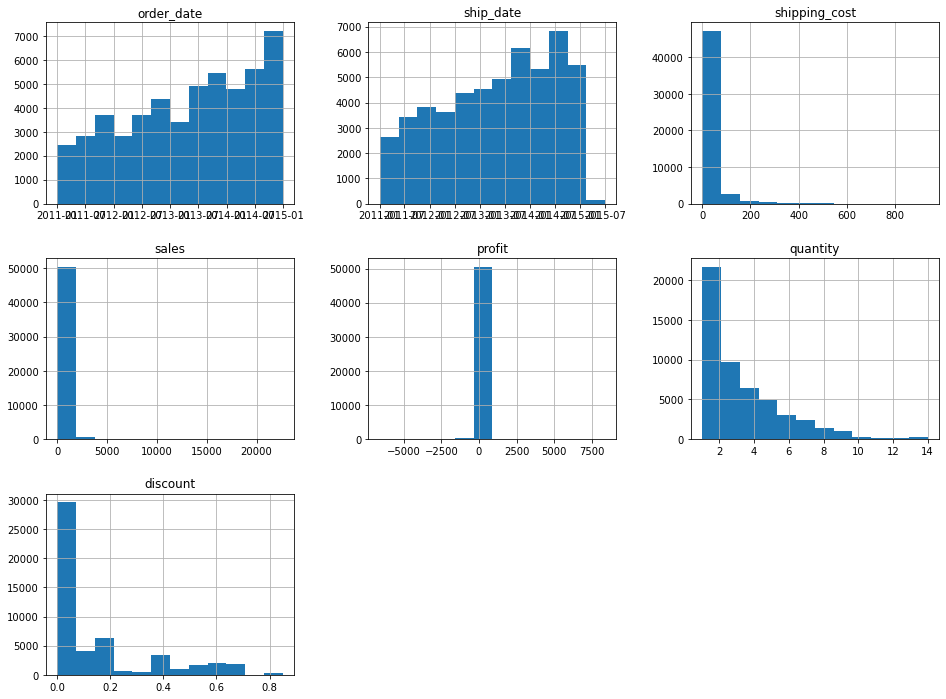

In [73]:
# distribution of variables using histograms
data.hist(bins=12,figsize=(16,12), column= ["order_date","ship_date","shipping_cost","sales","profit","quantity","discount"])#(width,length)
plt.show()

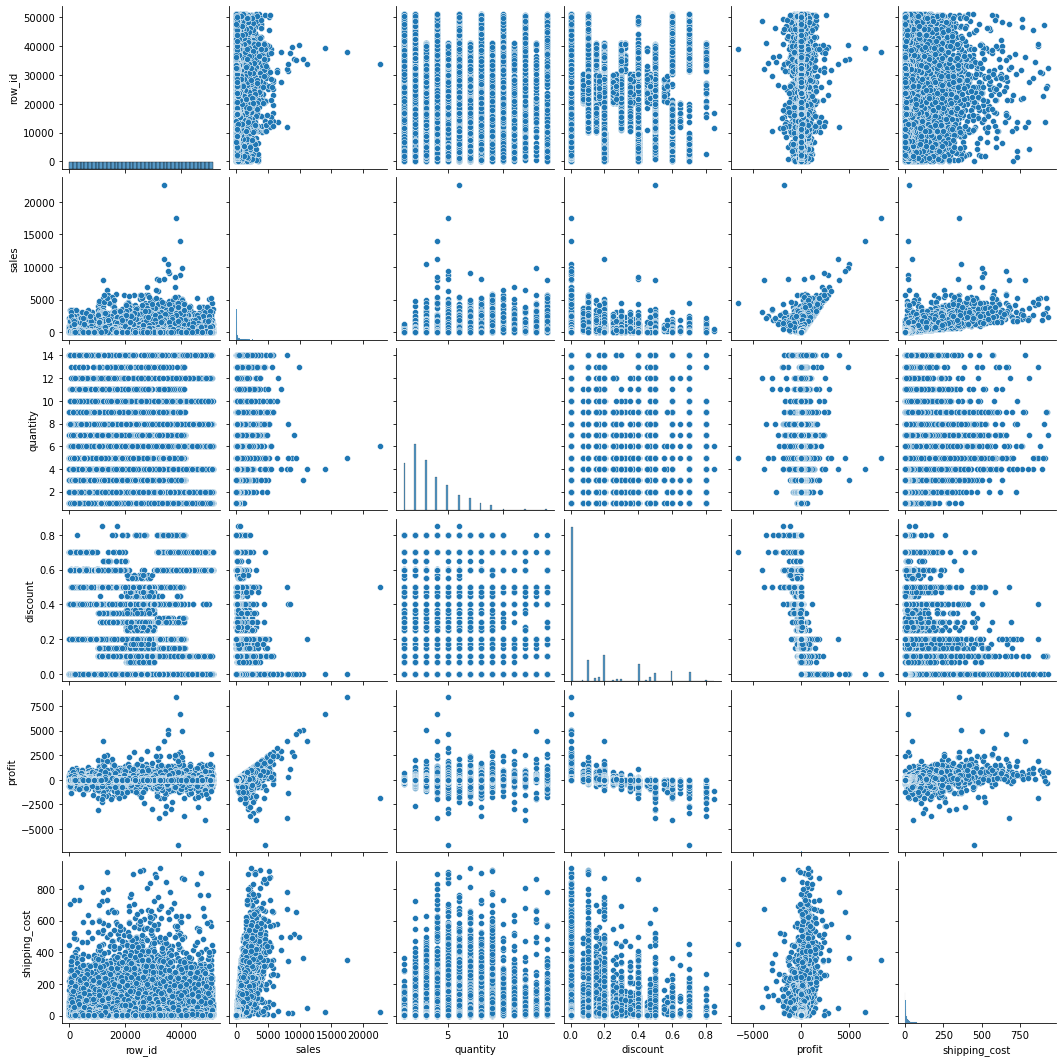

In [74]:
# distribution plot of variables using a pairplot
sns.pairplot(data)

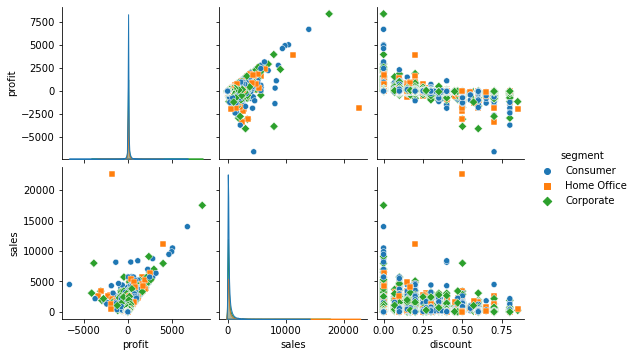

In [75]:
# zoning in for a distribution for profit, sales and discount
sns.pairplot(data,
             x_vars=["profit", "sales", "discount"],
             y_vars=["profit", "sales"],        
             hue = 'segment', markers=["o", "s", "D"])

From the graph above, the line between profit and sales variables shows a gentle positive slope. <br> 
This might suggest a posotive correlation between the profit and sales. 

In [76]:
# checking for correlation between sales and discount
data['profit'].corr(data['sales'])

0.48491811261944484

The correlation values between  sales and profit is 0.49. This value shows the is a weak correlation between the variables. Correlation might not necessarily mean increase in sales causes increases in profit.

 [Back to Outline](#Contents)

# Feature-Engineering



In order to generate more insights from our data, there is the need to create new columns that would extract the following
- Unit price
- Discounted anount
- Sales to Profit Ratio
- Month
- Year
- Number of days for arrival of product



In [77]:
# calculating for unit_price
data['unit_price'] = data['sales']/(data['quantity']*(1 - data['discount']))
data.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58


In [78]:
# calculating for discounted_amount
data['discounted_amount'] = data['discount']* data['unit_price']*data['quantity']
data.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,0.000
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,13.374


In [79]:
discounted_data= data.loc[data['discounted_amount']>0]

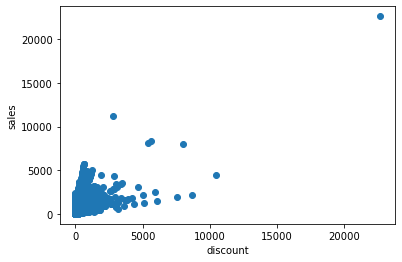

In [80]:
# plotting sales against discount
plt.scatter(x = discounted_data['discounted_amount'],y = discounted_data['sales'])
plt.xlabel("discount")
plt.ylabel("sales")
                                                                         
plt.show()

In [81]:
data['discount'].corr(data['sales'])

-0.08672186697182648

The correlation between discount and sales is -0.086. This suggests there is no correlation between  discount amount and sales

In [82]:
data["p-ratio"] = (data['profit']/data['sales']) #calculate the profit to sales ratio
data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount,p-ratio
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,0.000,0.259956
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,13.374,0.299387
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53,0.000,0.448276
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91,44.865,-0.580742
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26,12.630,0.332278


In [536]:
#extracting the month an order was placed
data['month'] = data['order_date'].dt.strftime('%b')
data.sample(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount,month,year,days
4755,14127,ES-2012-4868521,2012-04-08,2012-06-08,First Class,AH-10075,Adam Hart,Corporate,Flers,Lower Normandy,France,EU,Central,OFF-ST-10004191,Office Supplies,Storage,"Tenex Lockers, Blue",183.735,1,0.1,32.655,36.88,High,204.15,20.415,Apr,2012,61.0
47459,44320,NI-2014-8880,2014-01-29,2014-01-29,Same Day,TC-10980,Tamara Chand,Corporate,Aba,Abia,Nigeria,Africa,Africa,OFF-STA-10002791,Office Supplies,Art,"Stanley Sketch Pad, Water Color",14.283,1,0.7,-24.297,2.11,High,47.61,33.327,Jan,2014,0.0


In [83]:
##extracting the year an order was placed
data['year'] = data['order_date'].dt.year
data.sample(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount,p-ratio,year
34666,15916,IT-2014-5786366,2014-08-21,2014-08-21,Same Day,JO-15550,Jesus Ocampo,Home Office,London,England,United Kingdom,EU,North,OFF-ST-10001050,Office Supplies,Storage,"Eldon Shelving, Blue",87.156,2,0.1,16.416,10.48,Medium,48.42,9.684,0.188352,2014
29388,38540,CA-2014-118892,2014-08-18,2014-08-23,Second Class,TP-21415,Tom Prescott,Consumer,Philadelphia,Pennsylvania,United States,US,East,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.882,566.65,Medium,700.98,1892.646,-0.142857,2014


In [84]:
# calculating the days between order date and shipping date
data['days']= (abs(data['ship_date']-data['order_date']))/np.timedelta64(1,'D')  
data.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,unit_price,discounted_amount,p-ratio,year,days
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,0.000,0.259956,2011,151.0
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,13.374,0.299387,2011,212.0


 [Back to Outline](#Contents)

# Further-Analysis

###  Analysis will be based on  the following

- [Per market analysis](#MARKET-PERFORMANCE)
- [Product Per Market Performance](#PRODUCT-PERFORMANCE-PER-MARKET)
- [Product demand Analysis](#PRODUCT-DEMAND-ANALYSIS)
- [Analysis Per Location](#ANALYSIS-PER-LOCATION)
- [Per Location](#Analysis-from-location)
- [Segment](#Analysis-per-segment)
- [Order Priority](#Order-priority)
- [Per Month Analysis](#Analysis-per-month)
- [Relationship between variables](#Correlation-between-varaiables)



# A.MARKET-PERFORMANCE
1. What is the sales and profit per market? 

2. What is the most and least profitable market?

### 1. What is the sales and profit per market? 

In [85]:
# unique markets
data["market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [86]:
# grouping sales and profit by market
sp_market=data.groupby("market")["sales","profit"].sum()
sp_market

,sales,profit
market,,
APAC,3.585744e+06,436000.04900
Africa,7.837732e+05,88871.63100
Canada,6.692817e+04,17817.39000
EMEA,8.061613e+05,43897.97100
EU,2.938089e+06,372829.74150
LATAM,2.164605e+06,221643.48708
US,2.297201e+06,286397.02170


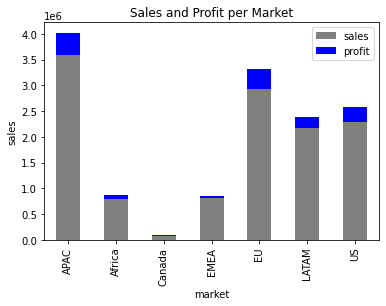

In [442]:
#sales and profit per market
sp_market.plot(kind="bar",stacked=True,color=("grey","blue"))
plt.title("Sales and Profit per Market")
plt.ylabel("sales")
plt.show()

APAC market recorded the highest sales and profit whiles the Cananda marked recorded the least sales and profit.
The top 4 markets include APAC, EU, LATAM and US respectively. Canda recorded the lowest sales and profit followed by EMEA and Africa


### 2. What is the most and least profitable market?

In [87]:
# grouping profit my market
pro_mark = data.groupby(["market"]).sum()[["profit"]].sort_values("profit")
pro_mark

,profit
market,
Canada,17817.39000
EMEA,43897.97100
Africa,88871.63100
LATAM,221643.48708
US,286397.02170
EU,372829.74150
APAC,436000.04900


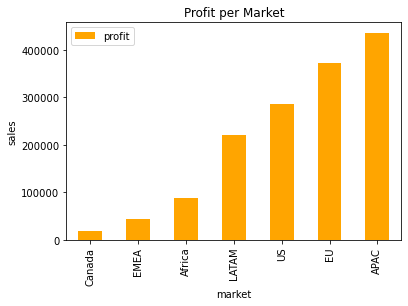

In [89]:
# ploting sales per market
pro_mark.plot(kind="bar",stacked=True,color=('orange'))
plt.title("Profit per Market")
plt.ylabel("sales")
plt.show()

 The least profitable market is Canada. It made a profit of 17817.39 dollars whiles the most profitable market is APAC. It made a profit of 436000.05 dollars

# PRODUCT-PERFORMANCE-PER-MARKET


### 3. What is the dominant product category in each market

In [91]:
# subseting data set for a given market
APAC=data[data["market"]=="APAC"]
Africa=data[data["market"]=="Africa"]
EMEA=data[data["market"]=="EMEA"]
EU=data[data["market"]=="EU"]
US=data[data["market"]=="US"]
LATAM=data[data["market"]=="LATAM"]
Canada=data[data["market"]=="Canada"]

In [210]:
data.groupby(["sub-category"]).sum()[["sales"]].sort_values("sales", ascending = False).head(10)

,sales
sub-category,
Phones,1.706824e+06
Copiers,1.509436e+06
Chairs,1.501682e+06
Bookcases,1.466572e+06
Storage,1.127086e+06
Appliances,1.011064e+06
Machines,7.790601e+05
Tables,7.570419e+05
Accessories,7.492370e+05


In [211]:
# profit by various sub- categories
data.groupby(["sub-category"]).sum()[["profit"]].sort_values("profit", ascending = False).head(10)

,profit
sub-category,
Copiers,258567.54818
Phones,216717.00580
Bookcases,161924.41950
Appliances,141680.58940
Chairs,140396.26750
Accessories,129626.30620
Storage,108461.48980
Binders,72449.84600
Paper,59207.68270


In [207]:
# grouping sales by product_name, category,sub-category for the APAC market
APAC.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Advantus Thumb Tacks, Assorted Sizes",Office Supplies,Fasteners,9.9360
"Accos Push Pins, 12 Pack",Office Supplies,Fasteners,22.4595
"OIC Thumb Tacks, Assorted Sizes",Office Supplies,Fasteners,23.0400
"Ames Manila Envelope, Recycled",Office Supplies,Envelopes,23.4900
"Novimex File Folder Labels, Adjustable",Office Supplies,Labels,27.6750
"Stanley Pens, Fluorescent",Office Supplies,Art,28.5012
"Rubbermaid Door Stop, Durable",Furniture,Furnishings,29.8059
"Eldon Folders, Single Width",Office Supplies,Storage,34.0200
"Avery File Folder Labels, Laser Printer Compatible",Office Supplies,Labels,34.3824


In [208]:
# grouping sales by product_name, category,sub-category for the Africa market
Africa.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Novimex File Folder Labels, Adjustable",Office Supplies,Labels,1.845
"Harbour Creations File Folder Labels, Adjustable",Office Supplies,Labels,1.989
"Eldon Box, Blue",Office Supplies,Storage,3.078
"Smead Removable Labels, 5000 Label Set",Office Supplies,Labels,3.150
"Novimex Legal Exhibit Labels, 5000 Label Set",Office Supplies,Labels,3.258
"Smead Color Coded Labels, 5000 Label Set",Office Supplies,Labels,4.032
"Xerox Memo Slips, Recycled",Office Supplies,Paper,4.032
"Eaton Memo Slips, Recycled",Office Supplies,Paper,4.095
"Accos Push Pins, 12 Pack",Office Supplies,Fasteners,4.185


In [209]:
# grouping sales by product_name, category,sub-category for the EMEA market
EMEA.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Harbour Creations Round Labels, Adjustable",Office Supplies,Labels,1.860
"Smead Round Labels, Alphabetical",Office Supplies,Labels,2.688
"Advantus Staples, Assorted Sizes",Office Supplies,Fasteners,3.324
"Novimex Legal Exhibit Labels, Adjustable",Office Supplies,Labels,3.348
"GlobeWeis Clasp Envelope, Recycled",Office Supplies,Envelopes,3.480
"Accos Paper Clips, Bulk Pack",Office Supplies,Fasteners,4.248
"Wilson Jones Hole Reinforcements, Economy",Office Supplies,Binders,4.530
"Novimex Round Labels, Adjustable",Office Supplies,Labels,5.004
"Avery Color Coded Labels, Laser Printer Compatible",Office Supplies,Labels,5.316


In [97]:
# grouping sales by product_name, category,sub-category for the EU market
EU.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Harbour Creations File Folder Labels, Alphabetical",Office Supplies,Labels,8.550
"Novimex Round Labels, Alphabetical",Office Supplies,Labels,9.135
"Smead Shipping Labels, Adjustable",Office Supplies,Labels,9.510
"Accos Staples, Bulk Pack",Office Supplies,Fasteners,10.950
"Avery Shipping Labels, Alphabetical",Office Supplies,Labels,11.670
"Avery Shipping Labels, Laser Printer Compatible",Office Supplies,Labels,11.850
"Advantus Paper Clips, Bulk Pack",Office Supplies,Fasteners,14.070
"Smead Round Labels, Adjustable",Office Supplies,Labels,14.400
"SanDisk Mouse, USB",Technology,Accessories,19.260


In [98]:
# # grouping sales by product_name, category,sub-category for the US market
US.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,Office Supplies,Appliances,1.624
Avery 5,Office Supplies,Labels,5.760
Xerox 20,Office Supplies,Paper,6.480
Grip Seal Envelopes,Office Supplies,Envelopes,7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,Office Supplies,Art,7.700
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",Office Supplies,Art,7.800
Xerox 1989,Office Supplies,Paper,7.968
4009 Highlighters,Office Supplies,Art,8.040
Stockwell Gold Paper Clips,Office Supplies,Fasteners,8.096


In [100]:
# grouping sales by product_name, category,sub-category for the LATAM market
LATAM.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Enermax Memo Slips, Recycled",Office Supplies,Paper,8.304
"Eaton Computer Printout Paper, Multicolor",Office Supplies,Paper,11.184
"Harbour Creations Color Coded Labels, Adjustable",Office Supplies,Labels,17.280
"Epson Calculator, Wireless",Technology,Machines,18.564
"Xerox Memo Slips, Multicolor",Office Supplies,Paper,19.920
"GlobeWeis Business Envelopes, Set of 50",Office Supplies,Envelopes,20.808
"Smead File Folder Labels, Alphabetical",Office Supplies,Labels,23.200
"Ibico 3-Hole Punch, Clear",Office Supplies,Binders,23.928
"Smead Round Labels, 5000 Label Set",Office Supplies,Labels,27.216


In [101]:
# # grouping sales by product_name, category,sub-category for the Canada market
Canada.groupby(["product_name","category","sub-category"]).sum()[["sales"]].sort_values("sales").head(10)

,,,sales
product_name,category,sub-category,
"Novimex Round Labels, Adjustable",Office Supplies,Labels,4.17
"Wilson Jones Hole Reinforcements, Economy",Office Supplies,Binders,4.53
"Smead Round Labels, Adjustable",Office Supplies,Labels,4.80
"Wilson Jones Index Tab, Clear",Office Supplies,Binders,5.91
"Hon Round Labels, Alphabetical",Office Supplies,Labels,6.48
"Acco Hole Reinforcements, Economy",Office Supplies,Binders,6.66
"Ibico Hole Reinforcements, Economy",Office Supplies,Binders,6.99
"Smead Removable Labels, Adjustable",Office Supplies,Labels,8.40
"Harbour Creations Legal Exhibit Labels, Adjustable",Office Supplies,Labels,8.85


For all markets, products that had a low demand were under the office supplies category. **Labels** was seen to  performed poorly
in all markets. <br>
Other sub-categories that recorded low demand include **Binders, Labels, Papers,Envelopes and Fasterners**.

Most of these products are less expensive, hence we can make more sales by making more strategic campaingns such as discounts on bulk <br> purchases  for these products

### 4.What product categories should be targetted to the different markets? 

In [568]:
# grouping sales and profit by sub-category for the APAC market
APAC.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Phones,486354.4962,81314.0562
Copiers,494593.6752,80854.0452
Bookcases,504823.0785,67656.5085
Chairs,512974.1982,62202.0882
Appliances,307620.7290,42128.7090
Machines,190306.8201,26542.6401
Storage,216075.7614,24744.1714
Furnishings,101037.9819,16166.3019
Accessories,186235.2345,15883.1145


The company should invest more in Phones, Coppier, BookCases and  Chairs for the market in APAC  as these products made a high profit

In [131]:
# grouping sales and profit by sub-category for the Africa market
Africa.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Phones,114832.854,17694.564
Copiers,96257.682,14008.632
Storage,96674.115,11915.085
Bookcases,83457.408,7164.918
Accessories,42172.092,6478.182
Machines,69104.415,5948.115
Tables,34532.595,4010.685
Art,38435.793,3977.253
Appliances,62186.376,3670.266


The company should invest more in Phones, Coppiers and Storage for the market in Africa as these products made a high profit

In [132]:
# grouping sales and profit by sub-category for the EMEA market
EMEA.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Copiers,80140.419,8178.309
Bookcases,91736.916,7938.246
Accessories,44164.143,3583.383
Storage,98184.630,3452.520
Appliances,68270.178,3024.048
Phones,114520.605,2990.925
Binders,26667.219,2909.739
Tables,39333.921,2764.251
Machines,62029.416,2741.826


The company should invest more in Coppiers, Bookcases, Storage, Acessories for the market in EMEA as these products made a high profit

In [133]:
# grouping sales and profit by sub-category for the US market
US.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Copiers,149528.030,55617.8249
Phones,330007.054,44515.7306
Accessories,167380.318,41936.6357
Paper,78479.206,34053.5693
Binders,203412.733,30221.7633
Chairs,328449.103,26590.1663
Storage,223843.608,21278.8264
Appliances,107532.161,18138.0054
Furnishings,91705.164,13059.1436


The company should invest more in  Coppiers, Phones and Accessories for the market in US as these products made a high profit

In [135]:
# grouping sales and profit by sub-category for the EU market
EU.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Bookcases,363525.699,56407.269
Copiers,365128.614,56199.654
Appliances,275439.183,46337.433
Phones,361312.032,37344.372
Accessories,163073.463,33441.543
Art,160088.184,30793.704
Storage,339684.267,27949.917
Chairs,228980.967,19791.567
Binders,99762.690,19760.220


The company should invest more in BookCases, Coppiers and   and Appliances for the market in EU as these products made a high profit

In [136]:
# grouping sales and profit by sub-category for the lATAM market
LATAM.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Copiers,316322.32308,41045.44308
Phones,289711.48800,30177.48800
Chairs,302219.21200,28781.19200
Accessories,141738.55800,27008.13800
Appliances,182075.24800,26148.14800
Bookcases,302415.12400,24887.50400
Storage,142036.18000,16208.54000
Supplies,43238.56800,7570.86800
Art,41184.59600,6950.69600


The company should invest more in  Coppiers and  Phones for the market in LATAM as these products made a high profit

In [137]:
# grouping sales and profit by sub-category for the Canada market
Canada.groupby(["sub-category"]).sum()[["sales","profit"]].sort_values(["profit","sales"],ascending = False).head(10)

,sales,profit
sub-category,,
Storage,10587.30,2912.43
Phones,10085.61,2679.87
Copiers,7465.53,2663.64
Appliances,7940.43,2233.98
Bookcases,5734.02,1342.53
Accessories,4473.21,1295.31
Art,4119.54,913.35
Chairs,3203.37,856.74
Binders,3089.34,786.18


The company should invest more in Storage, Phones,Copiers,Appliances for the market in Canada as these products made a high profit

# PRODUCT DEMAND ANALYSIS

### 5. How are you going to increase the sales for the products that least bought?

In [138]:
#finding unique values of quantity
data["quantity"].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [139]:
##finding value_counts of quantity
data["quantity"].value_counts()

2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: quantity, dtype: int64

In [140]:
# mean quantity bought
data["quantity"].mean()

3.4765451355039967

The average quantity ordered for a transaction is 3

In [141]:
#least product bought based on quantity sold
# We assumme the quantity less bought are the ones with quantity less than the mean quantity, 3
data_quant_least = data[data['quantity']<3]
data_quant_least.groupby(["sub-category"]).sum()[["quantity","sales","profit"]].sort_values("quantity").head(10)

,quantity,sales,profit
sub-category,,,
Tables,541,151033.7223,-8066.4277
Machines,1073,165451.2752,12050.8808
Appliances,1188,207681.4531,27563.0727
Supplies,1572,44447.6297,4083.8507
Fasteners,1596,16434.9138,2241.6793
Copiers,1598,307890.5444,43818.8070
Bookcases,1646,300895.6511,34495.1434
Envelopes,1679,34918.8362,5854.1849
Labels,1729,13184.9088,2385.0822


Tables recorded the least quantity demand and also made a loss. Since adding a discount might not necessarily increase sales, the company should  consider how other factor such as the shipping cost and shipping interval affect customer behaviour

In [615]:
#most product bought based on quantity sold
# We assumme the quantity  bought more are the ones with quantity equal to or more than the mean quantity, 3
data_quant_most = data[data['quantity']>=3]
data_quant_most.groupby(["product_name","category","sub-category"]).sum()[["quantity","sales","profit"]].sort_values("quantity",ascending = False).head(10)

,,,quantity,sales,profit
product_name,category,sub-category,,,
"Cardinal Index Tab, Clear",Office Supplies,Binders,283,1632.2458,481.8558
"Eldon File Cart, Single Width",Office Supplies,Storage,261,27326.5370,2512.2870
"Stockwell Paper Clips, Assorted Sizes",Office Supplies,Fasteners,220,2102.9497,224.1297
"Sanford Pencil Sharpener, Water Color",Office Supplies,Art,203,4312.2611,468.8911
"Rogers File Cart, Single Width",Office Supplies,Storage,199,23354.9137,2728.8737
"Avery Index Tab, Clear",Office Supplies,Binders,199,1072.4816,207.6916
Staples,Office Supplies,Fasteners,197,692.8720,268.3719
"Smead File Cart, Single Width",Office Supplies,Storage,195,20054.7876,181.7076
"Stanley Pencil Sharpener, Water Color",Office Supplies,Art,192,4327.5050,78.8750


Binders had the highest demand in terms of quantity specifically the Cardinal Index Tab, Clear product

### 6. Which products are making loss?

In [142]:
# extracting orders that made a loss
profit_loss = data[data['profit']<0]
profit_loss.groupby(["product_name","sub-category"]).sum()[["profit"]].sort_values("profit").head(10)

,,profit
product_name,sub-category,
Cubify CubeX 3D Printer Double Head Print,Machines,-9239.9692
"Hoover Stove, White",Appliances,-6941.3190
GBC DocuBind P400 Electric Binding System,Binders,-6859.3896
"Apple Smart Phone, Full Size",Phones,-6561.1119
"Motorola Smart Phone, Cordless",Phones,-6511.9380
"Samsung Smart Phone, Cordless",Phones,-6191.9100
"Cisco Smart Phone, Cordless",Phones,-5516.2600
"Nokia Smart Phone, Full Size",Phones,-5286.4945
Lexmark MX611dhe Monochrome Laser Printer,Machines,-5269.9690


Cubify CubeX 3D Printer Double, 2Hoover Stove,GBC DocuBind P400 Electric Binding System	are the top 3 product which are making a loss

# Analysis-from-location

### 7.What is the average shipping cost to each region?

In [143]:
avg_ship_cost= data.groupby(["region"]).mean()[["shipping_cost"]].sort_values("shipping_cost")
avg_ship_cost

,shipping_cost
region,
EMEA,17.573221
Africa,19.215058
Canada,19.285495
Caribbean,21.059260
West,23.887687
South,25.353509
East,25.542001
Central,26.710494
North,27.476299


<AxesSubplot:xlabel='region'>

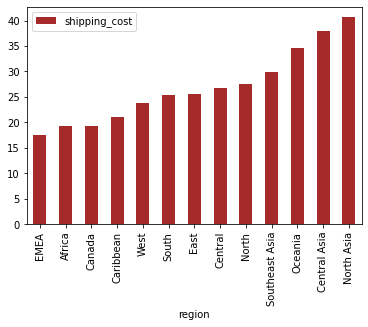

In [144]:
avg_ship_cost.plot(kind ='bar', color = 'brown')

Regions that have low shipping cost include EMEA,Africa,Canada and Carribean whiles regions that recorded expensice shipping <br>
 cost include North Asiia, Central Asia and Oceania.

## 8. City with most orders for a given product category?

In [200]:
# sum of profit and sales for each region
sales_per_region = data.groupby(["city"]).sum()[["profit"]].sort_values("profit", ascending = False).head(10)
(sales_per_region)

,profit
city,
New York City,62036.98370
Los Angeles,30440.75790
Seattle,29156.09670
Managua,17853.71804
San Francisco,17507.38540
London,17378.71500
Sydney,16002.80700
Vienna,15660.84000
San Salvador,15036.51040


In [196]:
data['city'].nunique()

3636

# Analysis-per-month

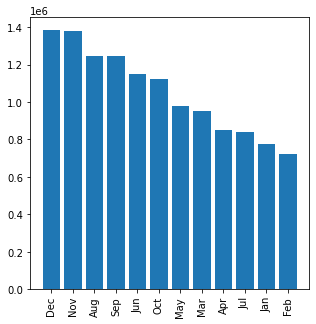

In [486]:
#Plotting to find the highest sales and rotating the xlabels
plt.figure(figsize=[5,5])
plt.bar(month_sales.index,month_sales["sales"])
plt.xticks(rotation=90)
plt.show()

# Analysis-per-segment

### 9. Which segment provides more profit?

In [224]:
seg = data.groupby(["segment"]).sum()[["sales","profit"]].sort_values(["sales","profit"])
seg

,sales,profit
segment,,
Home Office,2.309855e+06,277009.18056
Corporate,3.824698e+06,441208.32866
Consumer,6.507949e+06,749239.78206


Text(0, 0.5, 'sales')

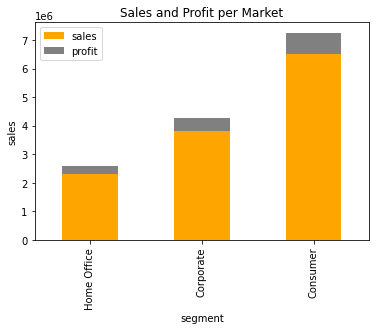

In [216]:
seg.plot(kind="bar",stacked=True,color=("orange","grey"))
plt.title("Sales and Profit per Market")
plt.ylabel("sales")

# Order-priority

### 10. Which order priority yields more sales?¶

In [ ]:
priority= data.groupby('order_priority')["sales","profit"].sum().sort_values(["sales","profit"], ascending = False)
priority

Text(0, 0.5, 'sales')

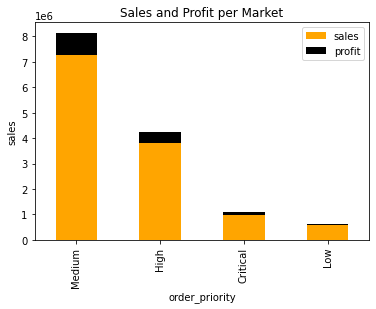

In [459]:
priority.plot(kind="bar",stacked=True,color=("orange","black"))
plt.title("Sales and Profit per Market")
plt.ylabel("sales")

# Correlation-between-varaiables

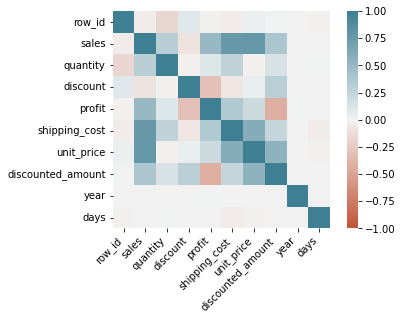

In [480]:
# a heat map showing the correlation between the variables
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 11. What is the correlation between discount and sale?

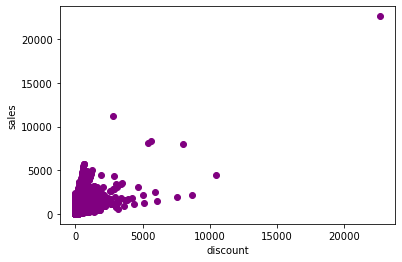

In [226]:
# plotting sales against discount
plt.scatter(x = discounted_data['discounted_amount'],y = discounted_data['sales'],color = "purple")
plt.xlabel("discount")
plt.ylabel("sales")
                                                                         
plt.show()

In [ ]:
data['discounted_amount'].corr(data['sales'])

## 13. what it the correlation between shipping cost and profit?

In [478]:
data["sales"].corr(data["shipping_cost"])

0.7680728376889517

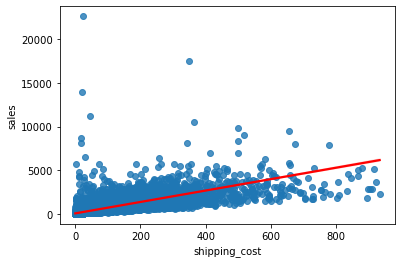

In [500]:
sns.regplot(x="shipping_cost",y="sales",data=data, line_kws={"color": "red"})
plt.show()

### 14. what is the correlation between quantity and profit?

In [227]:
data['quantity'].corr(data['profit'])

0.10436502716960332

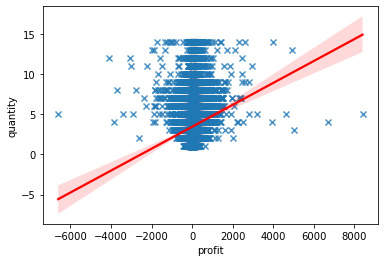

In [228]:
sns.regplot(x="profit",y="quantity",data=data, line_kws={"color": "red"}, marker='x',)
plt.show()

## 15. Does the shipping cost affect the sales?

In [229]:
 data.groupby('shipping_cost')["sales","profit"].sum().sort_values(["sales","profit"], ascending = False)


,sales,profit
shipping_cost,,
24.29,23144.2530,-1717.8474
349.07,17499.9500,8399.9760
20.00,15671.3165,7017.5657
45.98,11769.9380,3760.3288
363.19,10499.9700,5039.9856
...,...,...
0.00,74.8200,4.2000
21.31,70.3500,34.4400
17.76,65.8800,7.7400


In [232]:
data['shipping_cost'].corr(data['sales'])


0.7680728376889517

There is a high correlation between shipping_cost and sales


## 16. Does the interval between the order date and the shipping date affect sale and profit

In [472]:

interval_effect= data.groupby('days')["sales","profit"].sum().sort_values(["sales","profit"])
interval_effect

,sales,profit
days,,
50.0,3.491400e+01,4.49400
21.0,7.908000e+01,5.68800
206.0,1.126340e+02,45.09490
294.0,1.518000e+02,9.87000
58.0,9.470560e+02,-262.08400
...,...,...
3.0,6.501334e+05,70790.78456
6.0,7.063975e+05,78505.49214
2.0,1.046412e+06,118332.70222


In [ ]:
interval_effect.sample(5)

In [470]:
data['days'].corr(data['profit'])


-0.0016591646258952198

In [301]:
data['days'].corr(data['sales'])

-0.007591433214567048

There is a negative correlation between the number the interval and with both profit and sales. For example some product took longer days to get shipped and made a high profit whiles other products had shorter intervals and yet recorded low sales

### 17. How does profit, quantity and sales differ per category?¶

In [182]:
# finding the sum of sales,quantity and profit for each category
sub_quant = data.groupby("category")["quantity"].sum() # htities
sub_sales= data.groupby("category")["sales"].sum()
sub_profit = data.groupby("category")["profit"].sum() 


In [173]:
# category vallues from sub_profit
category = sub_profit.index

<Figure size 1440x720 with 0 Axes>

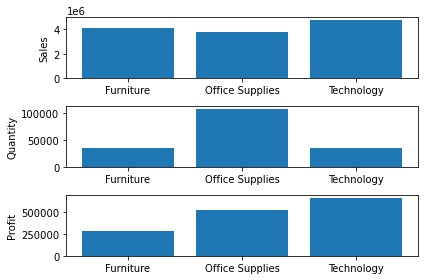

In [175]:
# comparing sales, quantity ordered and profit ofr each category of product
plt.figure(figsize=(20,10))
fig, axs = plt.subplots(3,1)
axs[0].bar(category, sub_sales)
axs[1].bar( category, sub_quant)
axs[2].bar(category, sub_profit)

axs[0].set_ylabel('Sales')
axs[1].set_ylabel('Quantity')
axs[2].set_ylabel('Profit')

fig.tight_layout()
plt.show()

- Furniture had a low demand and made low profit however it recorded a relatively high sales 
compared to office supplies.<br> This is because products under furniture naturally have a high selling price.<br>
- Office Supplies had a high demand and made good profit compared to furniture.<br>
- Technology is the most profitable category although it recorded the least quantity demanded

## 18. Average profit ratio


In [203]:
# average profit ratio
data['p-ratio'].median()

0.16917784275030825

The average profit  ratio for an order is 0.71

# Insights

1. High sales for a product does not necessarily mean increase in profit for an order. Some countries recorded low sales despite huge discounts given to customers
2. There is a strong relationship between shipping cost and sales for a product.
3. In all the markets, products under Technology specifically phones made high sales and profit.
4. The medium order yields more sales compared to the other order priorities
5. Top 3 products that are making a loss are Cubify CubeX 3D Printer Double, 2Hoover Stove  and GBC DocuBind<br>P400 Electric Binding System 
6. New York City was the city with the highest order, profit and sales
7. Most profitable market is APAC whiles the least profitable market is Canada
8. The month in which very high sales was recorded was December and January whiles February recorded the lowest sales


# Recommendation

- The company should invest more in Phones and Copiers as they are the highest selling and profitable 
products. Products should be coupled with less profitable products such as Papers, Machines and Binders 
to control the losses

- Company should create packages that for customers in the home office base that will include products for the office such as storage, labels, fasteners, copiers and book cases.

- Company should consider applying discounts to the price of shipping cost of products to encourage customers
to place for orders.

- Company should consider dropping low performing product such as papers, Machines and Binders or look for suppliers with cheaper prices.

- Company should Introduce special promotions for cities with high performing sales for specific products

- Technology is the most profitable product category despite having the least quantity demanded. 
Company should consider introducing some freebies when a customer buys a product from the Technology 
 category to increase sales.



 [Back to Outline](#Charlotte-Esi-Abraham-Super-Store-Data-Analysis)